In [1]:
import matplotlib.pyplot as plt
import cv2

In [3]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras_vggface.utils import preprocess_input
datagen = ImageDataGenerator(
    rescale=1/255, # масштабирование значений пикселей в диапазон от 0 до 1
    rotation_range=20, # угол поворота изображения
    width_shift_range=0.2, # смещение изображения по горизонтали
    height_shift_range=0.2, # смещение изображения по вертикали
    shear_range=0.2, # сдвиг изображения
    zoom_range=0.2, # масштабирование изображения
    vertical_flip=True,
    horizontal_flip=True, # отражение изображения по горизонтали
    brightness_range= (0.5,2.5),
    fill_mode='nearest', # заполнение пикселей после преобразований
    preprocessing_function=preprocess_input # препроцессинг изображений для распознавания лиц

)

In [ ]:
import os
from keras.preprocessing import image
import keras.utils as image


original_dir = 'фото/cuted_test/'

augmented_dir = 'фото/aug_cuted_test'

if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

for root, dirs, files in os.walk(original_dir):
    for filename in files:
        img_path = os.path.join(root, filename)
        img = image.load_img(img_path)
        img = img.convert('RGB')
        x = image.img_to_array(img)
        x = preprocess_input(x)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=augmented_dir,
                                  save_prefix=filename.split('.')[0],
                                  save_format='jpg'):
            i += 1
            if i >= 5: # random 5 images
                break


In [4]:
datagen.flow_from_directory('../фото/aug_c_t/aug_cuted_train/')

Found 2644 images belonging to 15 classes.


In [5]:
datagen.flow_from_directory('../фото/aug_c_t/aug_cuted_test/')

Found 298 images belonging to 15 classes.


In [19]:
image_shape = (64,64,3)
# image_shape = (224,224,3)

In [20]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

classifier= Sequential()


classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(15, activation='softmax'))

#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])




In [21]:
classifier.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [22]:
batch_size = 32

train_image_gen = datagen.flow_from_directory('../фото/aug_c_t/aug_cuted_train/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') 
                                               # shuffle = True) #binary, sparse, categorical

Found 2644 images belonging to 15 classes.


In [23]:
test_image_gen = datagen.flow_from_directory('../фото/aug_c_t/aug_cuted_test/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')
                                               # shuffle=True)

Found 298 images belonging to 15 classes.


In [24]:
train_image_gen.class_indices

{'Akhmedov Sanzhar': 0,
 'Alikhan Zhamankhan': 1,
 'Baibatchayeva Anar': 2,
 'Dalabay Abylay': 3,
 'Daniyar Raiymbekov': 4,
 'Duisenov Alikhan': 5,
 'Ernar': 6,
 'Kenzhebay Askar': 7,
 'Kyran Yerkin': 8,
 'Maxat Ualikhan': 9,
 'Rysmambetov Nurtugan': 10,
 'Sagynbek Nurbolat': 11,
 'Yerkin Yernar': 12,
 'Zhetessov Nur': 13,
 'Zhumabekov Magjan': 14}

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
print(train_image_gen.n)
print(train_image_gen.batch_size)

2644
32


In [27]:
hehe = classifier.fit_generator(
                    train_image_gen,
                    steps_per_epoch=train_image_gen.n // train_image_gen.batch_size,
                    epochs=10,
                    validation_data=test_image_gen,
                    validation_steps=test_image_gen.n // test_image_gen.batch_size)

Epoch 1/10
82/82 [==============================] - 36s 427ms/step - loss: 2.6680 - accuracy: 0.1007 - val_loss: 2.6090 - val_accuracy: 0.1181
Epoch 2/10
82/82 [==============================] - 34s 411ms/step - loss: 2.5053 - accuracy: 0.1604 - val_loss: 2.5443 - val_accuracy: 0.1632
Epoch 3/10
82/82 [==============================] - 34s 419ms/step - loss: 2.3058 - accuracy: 0.2232 - val_loss: 2.3715 - val_accuracy: 0.2569
Epoch 4/10
82/82 [==============================] - 28s 340ms/step - loss: 2.1153 - accuracy: 0.2956 - val_loss: 2.2633 - val_accuracy: 0.3125
Epoch 5/10
82/82 [==============================] - 27s 332ms/step - loss: 1.9553 - accuracy: 0.3641 - val_loss: 2.1036 - val_accuracy: 0.3299
Epoch 6/10
82/82 [==============================] - 27s 331ms/step - loss: 1.8888 - accuracy: 0.3809 - val_loss: 2.0790 - val_accuracy: 0.3576
Epoch 7/10
82/82 [==============================] - 27s 333ms/step - loss: 1.7960 - accuracy: 0.4104 - val_loss: 1.9228 - val_accuracy: 0.4062

In [32]:
hehe = classifier.fit_generator(
                    train_image_gen,
                    steps_per_epoch=train_image_gen.n // train_image_gen.batch_size,
                    epochs=25,
                    validation_data=test_image_gen,
                    validation_steps=test_image_gen.n // test_image_gen.batch_size)

Epoch 1/25
82/82 [==============================] - 29s 355ms/step - loss: 1.5652 - accuracy: 0.4862 - val_loss: 1.8142 - val_accuracy: 0.4514
Epoch 2/25
82/82 [==============================] - 30s 369ms/step - loss: 1.5120 - accuracy: 0.5145 - val_loss: 1.7947 - val_accuracy: 0.4896
Epoch 3/25
82/82 [==============================] - 20s 247ms/step - loss: 1.5112 - accuracy: 0.5191 - val_loss: 1.7615 - val_accuracy: 0.5069
Epoch 4/25
82/82 [==============================] - 20s 242ms/step - loss: 1.4314 - accuracy: 0.5440 - val_loss: 1.6348 - val_accuracy: 0.4965
Epoch 5/25
82/82 [==============================] - 20s 238ms/step - loss: 1.4241 - accuracy: 0.5360 - val_loss: 1.5438 - val_accuracy: 0.5382
Epoch 6/25
82/82 [==============================] - 20s 240ms/step - loss: 1.3735 - accuracy: 0.5620 - val_loss: 1.6765 - val_accuracy: 0.5174
Epoch 7/25
82/82 [==============================] - 20s 238ms/step - loss: 1.3109 - accuracy: 0.5827 - val_loss: 1.7527 - val_accuracy: 0.4965

In [40]:
haha = classifier.fit_generator(
                    train_image_gen,
                    steps_per_epoch=train_image_gen.n // train_image_gen.batch_size,
                    epochs=100,
                    validation_data=test_image_gen,
                    validation_steps=test_image_gen.n // test_image_gen.batch_size)

Epoch 1/100
82/82 [==============================] - 27s 326ms/step - loss: 0.9546 - accuracy: 0.6899 - val_loss: 1.3942 - val_accuracy: 0.6181
Epoch 2/100
82/82 [==============================] - 19s 237ms/step - loss: 0.9268 - accuracy: 0.7090 - val_loss: 1.3678 - val_accuracy: 0.6181
Epoch 3/100
82/82 [==============================] - 19s 237ms/step - loss: 0.9363 - accuracy: 0.6998 - val_loss: 1.3885 - val_accuracy: 0.6319
Epoch 4/100
82/82 [==============================] - 19s 236ms/step - loss: 0.8881 - accuracy: 0.7190 - val_loss: 1.2372 - val_accuracy: 0.6458
Epoch 5/100
82/82 [==============================] - 20s 239ms/step - loss: 0.8933 - accuracy: 0.7240 - val_loss: 1.2397 - val_accuracy: 0.6424
Epoch 6/100
82/82 [==============================] - 19s 237ms/step - loss: 0.8843 - accuracy: 0.7228 - val_loss: 1.1530 - val_accuracy: 0.6771
Epoch 7/100
82/82 [==============================] - 19s 235ms/step - loss: 0.8605 - accuracy: 0.7309 - val_loss: 1.3697 - val_accuracy:

In [28]:
hehe.history['accuracy']

[0.1006891280412674,
 0.1604134738445282,
 0.22320061922073364,
 0.29555895924568176,
 0.36408883333206177,
 0.3809341490268707,
 0.4104134738445282,
 0.42611026763916016,
 0.44486984610557556,
 0.47970902919769287]

In [33]:
hehe.history['accuracy']

[0.4862174689769745,
 0.5145482420921326,
 0.5191424489021301,
 0.54402756690979,
 0.5359877347946167,
 0.5620214343070984,
 0.5826952457427979,
 0.5830780863761902,
 0.5911179184913635,
 0.5830780863761902,
 0.6022205352783203,
 0.6131860017776489,
 0.6244257092475891,
 0.639356791973114,
 0.6412710547447205,
 0.6539050340652466,
 0.648162305355072,
 0.6607963442802429,
 0.6730474829673767,
 0.6673047542572021,
 0.6891270875930786,
 0.6707503795623779,
 0.6630933880805969,
 0.696018397808075,
 0.6994640231132507]

In [43]:
haha.history['accuracy']

[0.6898928284645081,
 0.7090352177619934,
 0.6998468637466431,
 0.7189892530441284,
 0.7239663004875183,
 0.7228177785873413,
 0.7308575510978699,
 0.7419601678848267,
 0.7304747104644775,
 0.7454057931900024,
 0.7496171593666077,
 0.733537495136261,
 0.7454057931900024,
 0.7630168199539185,
 0.7492343187332153,
 0.7392802238464355,
 0.7565084099769592,
 0.7492343187332153,
 0.7702909708023071,
 0.75,
 0.7630168199539185,
 0.7718223333358765,
 0.7591883540153503,
 0.7725880742073059,
 0.766462504863739,
 0.7741194367408752,
 0.7817764282226562,
 0.7745022773742676,
 0.7833077907562256,
 0.7879019975662231,
 0.785442054271698,
 0.7867534160614014,
 0.7844563722610474,
 0.8001531362533569,
 0.7955589294433594,
 0.7932618856430054,
 0.79402756690979,
 0.7917304635047913,
 0.7982388734817505,
 0.8005359768867493,
 0.8085758090019226,
 0.8013016581535339,
 0.7955589294433594,
 0.7997702956199646,
 0.7978560328483582,
 0.7917304635047913,
 0.8058958649635315,
 0.8196784257888794,
 0.81623280

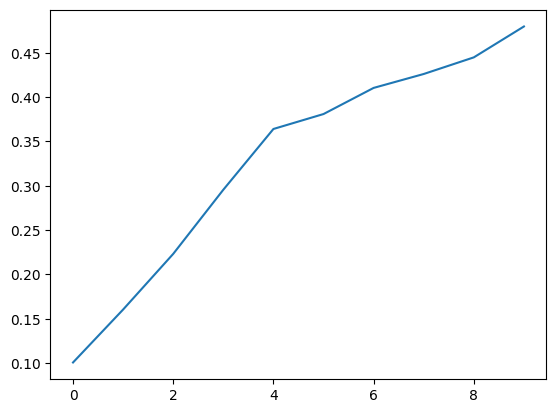

In [29]:
plt.plot(hehe.history['accuracy'])

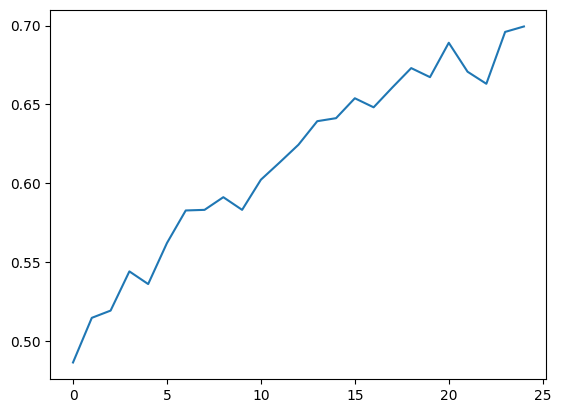

In [34]:
plt.plot(hehe.history['accuracy'])

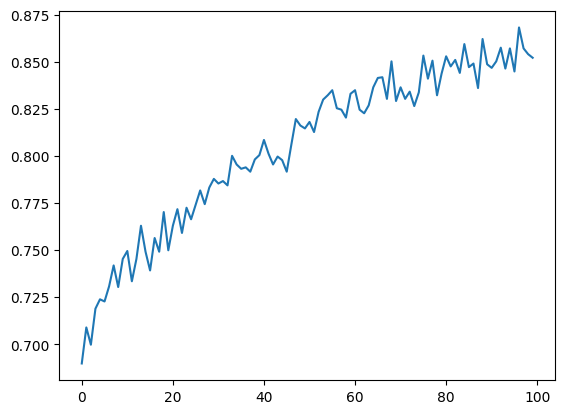

In [44]:
plt.plot(haha.history['accuracy'])

In [56]:
#**моделька переобучена** простая моделька

In [45]:
classifier.save('10+25+100epoch_cutedImageFace.h5')

In [55]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('10+25+100epoch_cutedImageFace.h5')

class_dict = {
    # 4: 'Akhmedov Sanzhar',
    # 1: 'Alikhan Zhamankhan',
    # 2: 'Baibatchayeva Anar',
    # 3: 'Dalabay Abylay',
    # 0: 'Ernar'
    0: 'Akhmedov Sanzhar',
    1: 'Alikhan Zhamankhan',
    2: 'Baibatchayeva Anar',
    3: 'Dalabay Abylay',
    4: 'Daniyar Raiymbekov',
    5: 'Duisenov Alikhan',
    6: 'Ernar',
    7: 'Kenzhebay Askar',
    8: 'Kyran Yerkin',
    9: 'Maxat Ualikhan',
    10: 'Rysmambetov Nurtugan',
    11: 'Sagynbek Nurbolat',
    12: 'Yerkin Yernar',
    13: 'Zhetessov Nur',
    14: 'Zhumabekov Magjan'
}
cap = cv2.VideoCapture(0)



while True:
    ret, frame = cap.read()
    # print(ret, frame)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (64, 64))
        face = np.expand_dims(face, axis=0)
        face = np.expand_dims(face, axis=-1)
        face = face / 255.0

        # prediction = model.predict(face)
        # prediction_class = np.argmax(prediction)
        # print(prediction_class)
        # prediction_value = prediction[prediction_class] * 100
        # name = class_dict[prediction_class]
        
        
        prediction = model.predict(face)
        prediction_class = np.argmax(prediction, axis=-1)
        prediction_value = prediction[0][prediction_class[0]] * 100
        name = class_dict[prediction_class[0]]

        
        
        

        label = f"{prediction_value:.2f}% match, {name}"
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 43ms/step
